# Proyecto Final
En este proyecto se va a analizar una base de datos que explica las ventas de diferentes tipos de supermercados, identificados como A.B.C, al igual se dividen en la ciudad donde se encuentran, etc.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Primero comenzaré con la información básica de la tabla

In [3]:
#Vemos la clase de la base
df = pd.read_csv('supermarket_sales.csv', index_col=0)
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
#Nos familiarizamos con la tabla
df.head(6)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1


In [43]:
df.tail()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.0720,85.5120,3/30/2019,12:51,Credit card,81.44,4.761905,4.0720,9.5
784-21-9238,C,Naypyitaw,Member,Male,Sports and travel,10.17,1,0.5085,10.6785,2/7/2019,14:15,Cash,10.17,4.761905,0.5085,5.9
516-77-6464,C,Naypyitaw,Member,Female,Health and beauty,10.16,5,2.5400,53.3400,2/24/2019,13:08,Ewallet,50.80,4.761905,2.5400,4.1
239-48-4278,A,Yangon,Member,Male,Food and beverages,10.13,7,3.5455,74.4555,3/10/2019,19:35,Ewallet,70.91,4.761905,3.5455,8.3
333-23-2632,A,Yangon,Member,Male,Health and beauty,10.08,7,3.5280,74.0880,3/28/2019,20:14,Cash,70.56,4.761905,3.5280,4.2


In [5]:
#Su información
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income

In [8]:
df.mean()

Unit price                  55.672130
Quantity                     5.510000
Tax 5%                      15.379369
Total                      322.966749
cogs                       307.587380
gross margin percentage      4.761905
gross income                15.379369
Rating                       6.972700
dtype: float64

In [22]:
#Sus columnasº
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [20]:
#Seleccionamos las características que queremos
df[["Unit price",'Total', "Quantity","gross income","cogs"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.0800,32.875000,55.230,77.93500,99.96
Total,1000.0,322.966749,245.885335,10.6785,124.422375,253.848,471.35025,1042.65
Quantity,1000.0,5.510000,2.923431,1.0000,3.000000,5.000,8.00000,10.00
gross income,1000.0,15.379369,11.708825,0.5085,5.924875,12.088,22.44525,49.65
cogs,1000.0,307.587380,234.176510,10.1700,118.497500,241.760,448.90500,993.00


In [28]:
#¿Hay missing values?
df.isnull().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [29]:
df.isna().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [12]:
df.sort_values('Unit price', ascending=False, inplace=True)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
148-41-7930,C,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.986,734.706,1/23/2019,10:33,Cash,699.72,4.761905,34.986,6.1
219-22-9386,B,Mandalay,Member,Male,Sports and travel,99.96,9,44.982,944.622,3/9/2019,17:26,Credit card,899.64,4.761905,44.982,4.2
641-62-7288,B,Mandalay,Normal,Male,Home and lifestyle,99.92,6,29.976,629.496,3/24/2019,13:33,Ewallet,599.52,4.761905,29.976,7.1
437-53-3084,B,Mandalay,Normal,Male,Fashion accessories,99.89,2,9.989,209.769,2/26/2019,11:48,Ewallet,199.78,4.761905,9.989,7.1
667-92-0055,A,Yangon,Member,Male,Health and beauty,99.83,6,29.949,628.929,3/4/2019,15:02,Ewallet,598.98,4.761905,29.949,8.5


In [37]:
df["Total"].mean()

322.9667490000004

In [13]:
df["cogs"].mean()

307.5873800000003

In [21]:
df["cogs"].std()

234.1765096199732

In [19]:
df["Unit price"].mean()

55.67213000000002

In [22]:
df["Unit price"].std()

26.494628347919754

In [17]:
df["Unit price"].head

<bound method NDFrame.head of Invoice ID
148-41-7930    99.96
219-22-9386    99.96
641-62-7288    99.92
437-53-3084    99.89
667-92-0055    99.83
               ...  
115-38-7388    10.18
784-21-9238    10.17
516-77-6464    10.16
239-48-4278    10.13
333-23-2632    10.08
Name: Unit price, Length: 1000, dtype: float64>

In [10]:
df[["Unit price","cogs"]]

,Unit price,cogs
Invoice ID,,
750-67-8428,74.69,522.83
226-31-3081,15.28,76.40
631-41-3108,46.33,324.31
123-19-1176,58.22,465.76
373-73-7910,86.31,604.17
...,...,...
233-67-5758,40.35,40.35
303-96-2227,97.38,973.80
727-02-1313,31.84,31.84


In [24]:
df[["Unit price","cogs"]].corr()

,Unit price,cogs
Unit price,1.000000,0.633962
cogs,0.633962,1.000000


In [23]:
df['Unit price'] >= 95

Invoice ID
148-41-7930     True
219-22-9386     True
641-62-7288     True
437-53-3084     True
667-92-0055     True
               ...  
115-38-7388    False
784-21-9238    False
516-77-6464    False
239-48-4278    False
333-23-2632    False
Name: Unit price, Length: 1000, dtype: bool

In [27]:
df[df['Unit price'] >= 95].head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
148-41-7930,C,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.986,734.706,1/23/2019,10:33,Cash,699.72,4.761905,34.986,6.1
219-22-9386,B,Mandalay,Member,Male,Sports and travel,99.96,9,44.982,944.622,3/9/2019,17:26,Credit card,899.64,4.761905,44.982,4.2
641-62-7288,B,Mandalay,Normal,Male,Home and lifestyle,99.92,6,29.976,629.496,3/24/2019,13:33,Ewallet,599.52,4.761905,29.976,7.1
437-53-3084,B,Mandalay,Normal,Male,Fashion accessories,99.89,2,9.989,209.769,2/26/2019,11:48,Ewallet,199.78,4.761905,9.989,7.1
667-92-0055,A,Yangon,Member,Male,Health and beauty,99.83,6,29.949,628.929,3/4/2019,15:02,Ewallet,598.98,4.761905,29.949,8.5


In [29]:
cond = df["Unit price"]>= 95
df[cond][["Unit price", "cogs"]]

,Unit price,cogs
Invoice ID,,
148-41-7930,99.96,699.72
219-22-9386,99.96,899.64
641-62-7288,99.92,599.52
437-53-3084,99.89,199.78
667-92-0055,99.83,598.98
...,...,...
743-88-1662,95.49,668.43
593-14-4239,95.46,763.68
554-42-2417,95.44,954.40


In [30]:
df[cond][["Unit price", "cogs"]].mean()

Unit price     98.023514
cogs          552.427297
dtype: float64

In [34]:
cond2 = (df["Unit price"]>90) & (df["Customer type"]== "Member")
df[cond2].head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
219-22-9386,B,Mandalay,Member,Male,Sports and travel,99.96,9,44.982,944.622,3/9/2019,17:26,Credit card,899.64,4.761905,44.982,4.2
667-92-0055,A,Yangon,Member,Male,Health and beauty,99.83,6,29.949,628.929,3/4/2019,15:02,Ewallet,598.98,4.761905,29.949,8.5
702-83-5291,C,Naypyitaw,Member,Male,Fashion accessories,99.82,9,44.919,943.299,3/27/2019,10:43,Cash,898.38,4.761905,44.919,6.6
815-11-1168,A,Yangon,Member,Male,Food and beverages,99.78,5,24.945,523.845,3/9/2019,19:09,Cash,498.90,4.761905,24.945,5.4
459-45-2396,A,Yangon,Member,Female,Food and beverages,99.60,3,14.940,313.740,2/25/2019,18:45,Cash,298.80,4.761905,14.940,5.8


In [41]:
cond3 = (df["Total"]>700) & (df["Branch"]== "A")
df[cond3]

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
638-60-7125,A,Yangon,Normal,Female,Electronic accessories,99.56,8,39.8240,836.3040,2/14/2019,17:03,Credit card,796.48,4.761905,39.8240,5.2
189-52-0236,A,Yangon,Normal,Male,Electronic accessories,99.55,7,34.8425,731.6925,3/14/2019,12:07,Cash,696.85,4.761905,34.8425,7.6
687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.4900,1039.2900,2/8/2019,16:20,Credit card,989.80,4.761905,49.4900,8.7
384-59-6655,A,Yangon,Member,Female,Food and beverages,98.66,9,44.3970,932.3370,2/19/2019,15:07,Cash,887.94,4.761905,44.3970,8.4
253-12-6086,A,Yangon,Member,Female,Sports and travel,98.40,7,34.4400,723.2400,3/12/2019,12:43,Credit card,688.80,4.761905,34.4400,8.7
827-77-7633,A,Yangon,Normal,Male,Sports and travel,98.09,9,44.1405,926.9505,2/17/2019,19:41,Cash,882.81,4.761905,44.1405,9.3
139-32-4183,A,Yangon,Member,Female,Sports and travel,97.48,9,43.8660,921.1860,3/14/2019,14:19,Ewallet,877.32,4.761905,43.8660,7.4
652-43-6591,A,Yangon,Normal,Female,Fashion accessories,97.29,8,38.9160,817.2360,3/9/2019,13:18,Credit card,778.32,4.761905,38.9160,6.2
805-86-0265,A,Yangon,Normal,Male,Home and lifestyle,93.96,9,42.2820,887.9220,3/20/2019,11:32,Cash,845.64,4.761905,42.2820,9.8


In [42]:
cond3 = (df["Total"]>700) & (df["Branch"]== "A")
df[cond3].mean()

Unit price                  85.281250
Quantity                     9.062500
Tax 5%                      38.345828
Total                      805.262391
cogs                       766.916563
gross margin percentage      4.761905
gross income                38.345828
Rating                       6.859375
dtype: float64

In [54]:
df[df['Date'] > "2019-14-01"].sort_values("Date")

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
470-31-3286,B,Mandalay,Normal,Male,Health and beauty,14.82,3,2.2230,46.6830,3/1/2019,11:30,Credit card,44.46,4.761905,2.2230,8.7
811-03-8790,A,Yangon,Normal,Female,Electronic accessories,45.48,10,22.7400,477.5400,3/1/2019,10:22,Credit card,454.80,4.761905,22.7400,4.8
238-45-6950,B,Mandalay,Member,Male,Food and beverages,53.72,1,2.6860,56.4060,3/1/2019,20:03,Ewallet,53.72,4.761905,2.6860,6.4
453-63-6187,B,Mandalay,Normal,Male,Electronic accessories,27.50,3,4.1250,86.6250,3/1/2019,15:40,Ewallet,82.50,4.761905,4.1250,6.5
207-73-1363,B,Mandalay,Normal,Male,Health and beauty,69.51,2,6.9510,145.9710,3/1/2019,12:15,Ewallet,139.02,4.761905,6.9510,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652-43-6591,A,Yangon,Normal,Female,Fashion accessories,97.29,8,38.9160,817.2360,3/9/2019,13:18,Credit card,778.32,4.761905,38.9160,6.2
277-35-5865,C,Naypyitaw,Member,Female,Food and beverages,98.97,9,44.5365,935.2665,3/9/2019,11:23,Cash,890.73,4.761905,44.5365,6.7
815-11-1168,A,Yangon,Member,Male,Food and beverages,99.78,5,24.9450,523.8450,3/9/2019,19:09,Cash,498.90,4.761905,24.9450,5.4


In [55]:
df['Branch'].unique()

array(['C', 'B', 'A'], dtype=object)

In [64]:
df[df["Branch"] == "A"]["City"].unique()

array(['Yangon'], dtype=object)

In [65]:
df.groupby('Branch')["Total"].mean().sort_values(ascending = False)

Branch
C    337.099715
B    319.872506
A    312.354031
Name: Total, dtype: float64

In [66]:
df.groupby('Branch')["Unit price"].mean().sort_values(ascending = False)

Branch
C    56.609024
B    55.659277
A    54.780853
Name: Unit price, dtype: float64

In [68]:
df.groupby('Branch')["cogs"].mean().sort_values(ascending = False)

Branch
C    321.047348
B    304.640482
A    297.480029
Name: cogs, dtype: float64

In [83]:
x= np.linspace (0,100,1000)
y= np.linspace (0,100,1000)
z = np.linspace(0,100,1000)

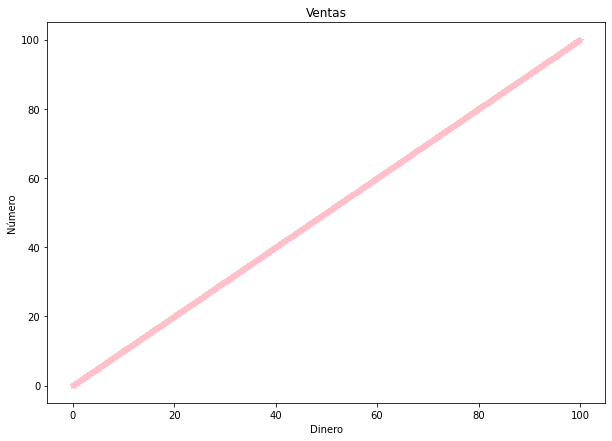

In [78]:
fig= plt.figure(figsize=(10,7))
plt.plot(x,y, color = "pink", marker = "*", linestyle = "--")
plt.title("Ventas")
plt.ylabel("Número")
plt.xlabel("Dinero")
plt.show()

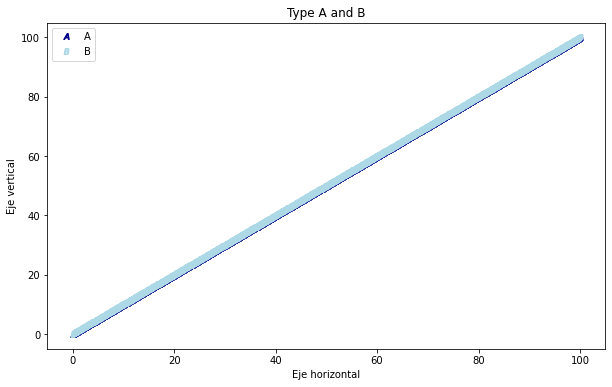

In [84]:
fig = plt.figure(figsize=(10, 6))
plt.plot(x, y, color = 'darkblue', label = "A", marker = "$A$", linestyle = "none")
plt.plot(x, z, color = 'lightblue', label = 'B', marker = "$B$", linestyle = "none")
plt.title('Type A and B')
plt.ylabel('Eje vertical')
plt.xlabel('Eje horizontal')
plt.legend()
plt.show()

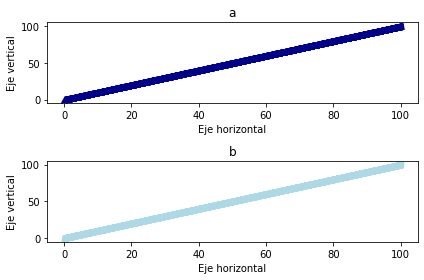

In [86]:
plt.subplot(2, 1, 1)
plt.plot(x, y, color = 'darkblue', label = "A", marker = "$A$", linestyle = "none")
plt.title('a')
plt.ylabel('Eje vertical')
plt.xlabel('Eje horizontal')

plt.subplot(2, 1, 2)
plt.plot(x, z, color = 'lightblue', label = 'B', marker = "$B$", linestyle = "none")
plt.title('b')
plt.ylabel('Eje vertical')
plt.xlabel('Eje horizontal')

plt.tight_layout()
plt.show()

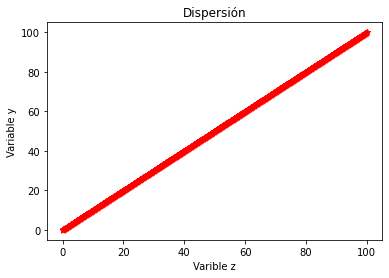

In [87]:
plt.scatter(z, y, color = 'red', marker = "*")
plt.title('Dispersión')
plt.xlabel('Varible z')
plt.ylabel('Variable y')
plt.show()

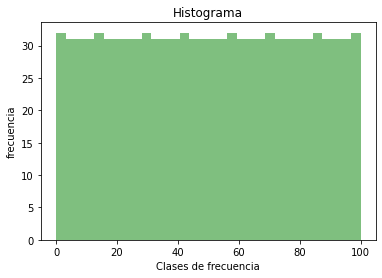

In [88]:
plt.hist(z, bins = "sqrt", color= "green", alpha = 0.5 )
plt.title ("Histograma")
plt.xlabel("Clases de frecuencia")
plt.ylabel("frecuencia")
plt.show()

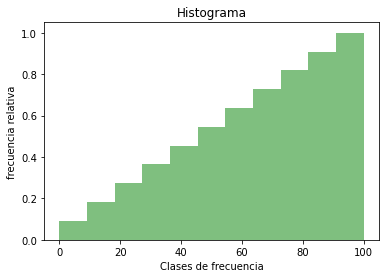

In [89]:
plt.hist(z, bins = "sturges", color= "green", alpha = 0.5, cumulative = True, density = True)
plt.title ("Histograma")
plt.xlabel("Clases de frecuencia")
plt.ylabel("frecuencia relativa")
plt.show()

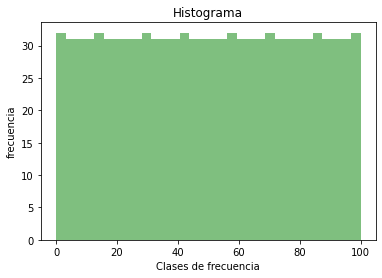

In [90]:
plt.hist(z, bins = "sqrt", color= "green", alpha = 0.5,cumulative = False )
plt.title ("Histograma")
plt.xlabel("Clases de frecuencia")
plt.ylabel("frecuencia")
plt.show()

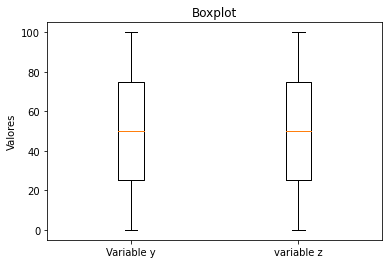

In [91]:
plt.boxplot([y, z])
plt.title('Boxplot')
plt.xticks(ticks = [1, 2], labels = ['Variable y', 'variable z'])
plt.ylabel('Valores')
plt.show()

In [92]:
def q25(x):
    return np.quantile(x, q = 0.25)

def q75(x):
    return np.quantile(x, q = 0.75)

In [94]:
print(df.groupby(['Branch', 'City'])['Total'].agg([np.mean, np.median, min, max, q25, q75]))

                        mean     median      min      max         q25  \
Branch City                                                             
A      Yangon     312.354031  240.82800  12.6945  1039.29  137.489625   
B      Mandalay   319.872506  252.88200  18.6375  1022.49  119.936250   
C      Naypyitaw  337.099715  271.41975  10.6785  1042.65  121.474500   

                         q75  
Branch City                   
A      Yangon     459.340875  
B      Mandalay   465.585750  
C      Naypyitaw  495.754875  


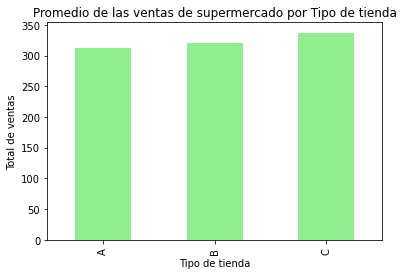

In [96]:
df.groupby('Branch')['Total'].mean().plot(kind = 'bar', color = 'lightgreen')
plt.title('Promedio de las ventas de supermercado por Tipo de tienda')
plt.xlabel('Tipo de tienda')
plt.ylabel('Total de ventas')
plt.show()

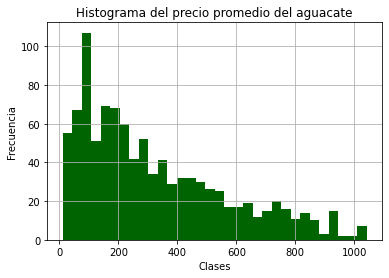

In [97]:
df['Total'].hist(bins='sqrt', color = 'darkgreen')
plt.title('Histograma del precio promedio del aguacate')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.show()

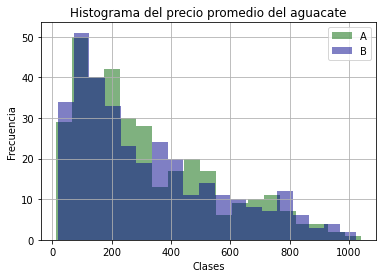

In [99]:
df[df['Branch'] == 'A']['Total'].hist(bins='sqrt', color = 'darkgreen',
                                                        label = 'A', alpha = 0.5)
df[df['Branch'] == 'B']['Total'].hist(bins='sqrt', color = 'darkblue',
                                                        label = 'B', alpha = 0.5)
plt.title('Histograma del precio promedio del aguacate')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [104]:
Ac = df[df['Branch'] == 'A']['Total']
Bc = df[df['Branch'] == 'B']['Total']

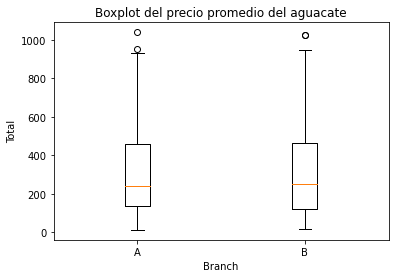

In [105]:
plt.boxplot([Ac, Bc])
plt.title('Boxplot del precio promedio del aguacate')
plt.xlabel('Branch')
plt.ylabel('Total')
plt.xticks(ticks = [1, 2], labels = ['A', 'B'])
plt.show()

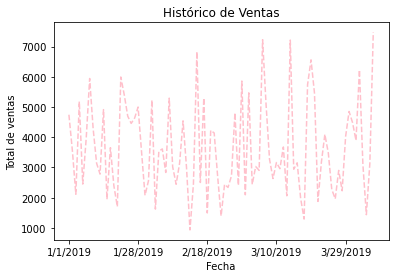

In [107]:
Total = df.groupby('Date')['Total'].sum()
Total.plot(kind = 'line', color = "pink", linestyle = ("--"))
plt.title("Histórico de Ventas")
plt.ylabel("Total de ventas")
plt.xlabel("Fecha")
plt.show()

In [108]:
Ac = df[df['Branch'] == 'A'][['Date', 'Total']]
Bc = df[df['Branch'] == 'B'][['Date', 'Total']]

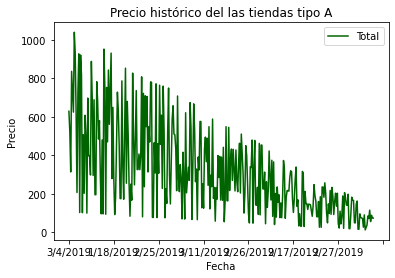

In [110]:
Ac.plot(x = 'Date', y = 'Total', color = 'darkgreen')
plt.title('Precio histórico del las tiendas tipo A')
plt.ylabel('Precio')
plt.xlabel('Fecha')
plt.show()

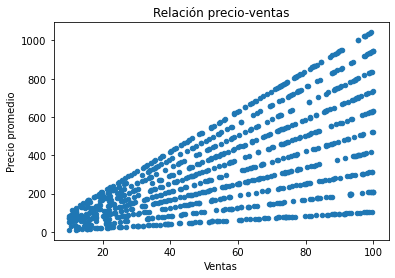

In [111]:
df.plot(x = 'Unit price', y = 'Total', kind = 'scatter')
plt.title('Relación precio-ventas')
plt.xlabel('Ventas')
plt.ylabel('Precio promedio')
plt.show()